In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from tqdm.notebook import trange, tqdm
import multiprocessing as mp
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/Work-Max/Proyecto')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA2/Work-Max/Proyecto


In [ ]:
ogle_train_data_lengths = np.load('data/ogle_train_data_lengths.npy')
np.shape(ogle_train_data_lengths)

(166075,)

<Figure size 720x720 with 0 Axes>

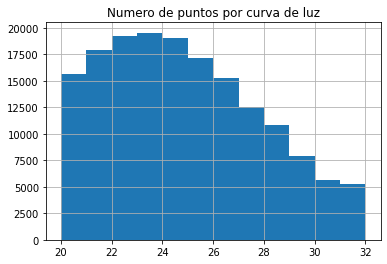

In [ ]:
puntos=pd.DataFrame()
puntos['Numero de puntos por curva de luz']=ogle_train_data_lengths
ax=plt.figure(figsize=(10,10))
ax=puntos.hist(bins=12)

In [ ]:
data_path='data/OGLE_data/'
star_folders=os.listdir(data_path)
star_data_folders=[data_path+star_type+'/V/' for star_type in star_folders]
star_data_folders

['data/OGLE_data/phot_acep/V/',
 'data/OGLE_data/phot_t2cep/V/',
 'data/OGLE_data/phot_ecl/V/',
 'data/OGLE_data/phot_cep/V/',
 'data/OGLE_data/phot_rrlyr/V/',
 'data/OGLE_data/ecl.npy/V/',
 'data/OGLE_data/t2cep.npy/V/',
 'data/OGLE_data/acep.npy/V/',
 'data/OGLE_data/cep.npy/V/',
 'data/OGLE_data/rrlyr.npy/V/']

In [ ]:
def subsample(serie,numbers,dist,mask_value):
  '''Function to decompose a time serie into multiple randomly subsampled time series with number of points given by
  numbers with distribution of number of points given by dist, the subsampled time series are padded with mask_value
  the return is a numpy array of shape (n,max_number,channels) where n is the number of generated subsampled series,
  max_number is the greatest value of numbers and channels is the features of the serie'''
  max_steps=np.max(numbers)
  l=len(serie)
  if l<=max_steps:
    arr=np.ones((1,max_steps,3))*mask_value
    s=np.shape(serie)
    arr[0,:s[0]]=serie
    return arr
  else:
    n=np.random.choice(numbers,replace=False, p=dist)
    sel=np.sort(np.random.choice(l,n,replace=False))
    serie_trunc=serie[sel]
    s=np.shape(serie_trunc)
    arr=np.ones((1,max_steps,3))*mask_value
    arr[0,:s[0]]=serie_trunc
    bool_sel=np.ones(l).astype(bool)
    bool_sel[sel]=False
    serie=serie[bool_sel]
    l=len(serie)
    while l>=max_steps:
      n=np.random.choice(numbers,replace=False, p=dist)
      sel=np.sort(np.random.choice(l,n,replace=False))
      serie_trunc=serie[sel]
      s=np.shape(serie_trunc)
      t=np.ones((1,max_steps,3))*mask_value
      t[0,:s[0]]=serie_trunc
      arr=np.concatenate((arr,t))
      bool_sel=np.ones(l).astype(bool)
      bool_sel[sel]=False
      serie=serie[bool_sel]
      l=len(serie) 
    if l>=np.min(numbers):
      s=np.shape(serie)
      t=np.ones((1,max_steps,3))*mask_value
      t[0,:s[0]]=serie
      arr=np.concatenate((arr,t))
    return arr

In [ ]:
numbers=np.unique(ogle_train_data_lengths).astype(int)
total=len(ogle_train_data_lengths)
prob=[sum(ogle_train_data_lengths==n)/total for n in tqdm(numbers)]

In [ ]:
acep_dir=os.listdir(star_data_folders[0])
print(len(acep_dir))
f=lambda star_name:np.genfromtxt(star_data_folders[0]+star_name,delimiter=" ")

start = timer()
acep=[subsample(f(star_name),numbers,prob,-8) for star_name in tqdm(acep_dir)]
end = timer()

print(end - start)
acep=np.concatenate(acep)
np.shape(acep)

136
0.413419423999585


(469, 32, 3)

In [ ]:
np.save(data_path+'acep',ecl)

In [ ]:
t2cep_dir=os.listdir(star_data_folders[1])
print(len(t2cep_dir))
f=lambda star_name:np.genfromtxt(star_data_folders[1]+star_name,delimiter=" ")

start = timer()
t2cep=[subsample(f(star_name),numbers,prob,-8) for star_name in tqdm(t2cep_dir)]
end = timer()

print(end - start)
t2cep=np.concatenate(t2cep)
np.shape(t2cep)

271
0.8302774900002987


(1272, 32, 3)

In [ ]:
np.save(data_path+'t2cep',ecl)

In [ ]:
ecl_dir=os.listdir(star_data_folders[2])
print(len(ecl_dir))
f=lambda star_name:np.genfromtxt(star_data_folders[2]+star_name,delimiter=" ")

start = timer()
ecl=[subsample(f(star_name),numbers,prob,-8) for star_name in tqdm(ecl_dir)]
end = timer()

print(end - start)
ecl=np.concatenate(ecl)
np.shape(ecl)

15360
4254.401526996999


(78290, 32, 3)

In [ ]:
np.save(data_path+'ecl',ecl)

In [ ]:
cep_dir=os.listdir(star_data_folders[3])
print(len(cep_dir))
f=lambda star_name:np.genfromtxt(star_data_folders[3]+star_name,delimiter=" ")

start = timer()
cep=[subsample(f(star_name),numbers,prob,-8) for star_name in tqdm(cep_dir)]
end = timer()

print(end - start)
cep=np.concatenate(cep)
np.shape(cep)

4368



1319.529572329


(20270, 32, 3)

In [ ]:
np.save(data_path+'cep',cep)

In [ ]:
rrlyr_dir=os.listdir(star_data_folders[4])
print(len(rrlyr_dir))
f=lambda star_name:np.genfromtxt(star_data_folders[4]+star_name,delimiter=" ")

start = timer()
rrlyr=[subsample(f(star_name),numbers,prob,-8) for star_name in tqdm(rrlyr_dir)]
end = timer()

print(end - start)
rrlyr=np.concatenate(rrlyr)
np.shape(rrlyr)

38354

In [ ]:
def f(star_name):
  return subsample(np.genfromtxt(star_data_folders[4]+star_name,delimiter=" "),numbers,prob,-8)

In [ ]:
num_workers = mp.cpu_count()  
pool = mp.Pool(num_workers)

#rrlyr_dir=os.listdir(star_data_folders[4])

start = timer()
rrlyr=pool.map(f, rrlyr_dir)
end = timer()
pool.close()
pool.join()


print(end - start)
rrlyr=np.concatenate(rrlyr)
np.shape(rrlyr)

4062.4453952409995


(138193, 32, 3)

In [ ]:
np.save(data_path+'rrlyr',rrlyr)

In [ ]:
def f(star_name):
  return subsample(np.genfromtxt(star_data_folders[3]+star_name,delimiter=" "),numbers,prob,-8)

In [ ]:
cep_dir=os.listdir(star_data_folders[3])
print(len(cep_dir))

4368


In [ ]:
start = timer()
cep=[f(star_name) for star_name in tqdm(cep_dir)]
end = timer()
print('List comprenhension',end - start)


List comprenhension 1423.0455405030007


In [ ]:
if __name__ == '__main__':
   with Pool(2) as p:
      r = list(tqdm.tqdm(p.imap(_foo, range(30)), total=30))

In [ ]:
num_workers = mp.cpu_count()  
pool = mp.Pool(num_workers+4)

In [ ]:
start = timer()
cep=pool.map(f, cep_dir)
end = timer()
print('Paralel with ' + str(num_workers) +' workers',end - start)

Paralel with 2 workers 9.607745625999996


In [ ]:
pool.close()
pool.join()